In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../data/raw/bacen_concessoes_financiamento_imobiliario_pf_tratado.csv")

df.head()


,data_ym\n,valor_concedido_milhoes\n
0,2015-01,11805.0
1,2015-02,8504.0
2,2015-03,11579.0
3,2015-04,11898.0
4,2015-05,8478.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data_ym
                  132 non-null    object 
 1   valor_concedido_milhoes
  131 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [4]:
df.head(), df.tail()


(  data_ym\n  valor_concedido_milhoes\n
 0   2015-01                    11805.0
 1   2015-02                     8504.0
 2   2015-03                    11579.0
 3   2015-04                    11898.0
 4   2015-05                     8478.0,
     data_ym\n  valor_concedido_milhoes\n
 127   2025-08                    18364.0
 128   2025-09                    19755.0
 129   2025-10                    21125.0
 130   2025-11                    18704.0
 131   1899-12                        NaN)

In [6]:
df.columns


Index(['data_ym\n', 'valor_concedido_milhoes\n'], dtype='object')

In [7]:
df.columns = df.columns.str.strip()

df.columns


Index(['data_ym', 'valor_concedido_milhoes'], dtype='object')

In [8]:
df["data"] = pd.to_datetime(df["data_ym"], format="%Y-%m")

df.dtypes


data_ym                            object
valor_concedido_milhoes           float64
data                       datetime64[ns]
dtype: object

In [9]:
df["valor_concedido_milhoes"].describe()


count      131.000000
mean     11991.625954
std       4765.932735
min       5350.000000
25%       7657.000000
50%      11579.000000
75%      16226.500000
max      21634.000000
Name: valor_concedido_milhoes, dtype: float64

In [10]:
df = df.sort_values("data")

df.head(), df.tail()


(     data_ym  valor_concedido_milhoes       data
 131  1899-12                      NaN 1899-12-01
 0    2015-01                  11805.0 2015-01-01
 1    2015-02                   8504.0 2015-02-01
 2    2015-03                  11579.0 2015-03-01
 3    2015-04                  11898.0 2015-04-01,
      data_ym  valor_concedido_milhoes       data
 126  2025-07                  17952.0 2025-07-01
 127  2025-08                  18364.0 2025-08-01
 128  2025-09                  19755.0 2025-09-01
 129  2025-10                  21125.0 2025-10-01
 130  2025-11                  18704.0 2025-11-01)

In [11]:
df[df["valor_concedido_milhoes"].isna()]


,data_ym,valor_concedido_milhoes,data
131,1899-12,NaN,1899-12-01


In [16]:
# Remover linhas com valor nulo
df = df.dropna(subset=["valor_concedido_milhoes"])

# Conferir se ainda existe NaN
df[df["valor_concedido_milhoes"].isna()]



,data_ym,valor_concedido_milhoes,data


In [17]:
df.describe()


,valor_concedido_milhoes,data
count,131.000000,131
mean,11991.625954,2020-05-31 20:53:07.786259456
min,5350.000000,2015-01-01 00:00:00
25%,7657.000000,2017-09-16 00:00:00
50%,11579.000000,2020-06-01 00:00:00
75%,16226.500000,2023-02-15 00:00:00
max,21634.000000,2025-11-01 00:00:00
std,4765.932735,NaN


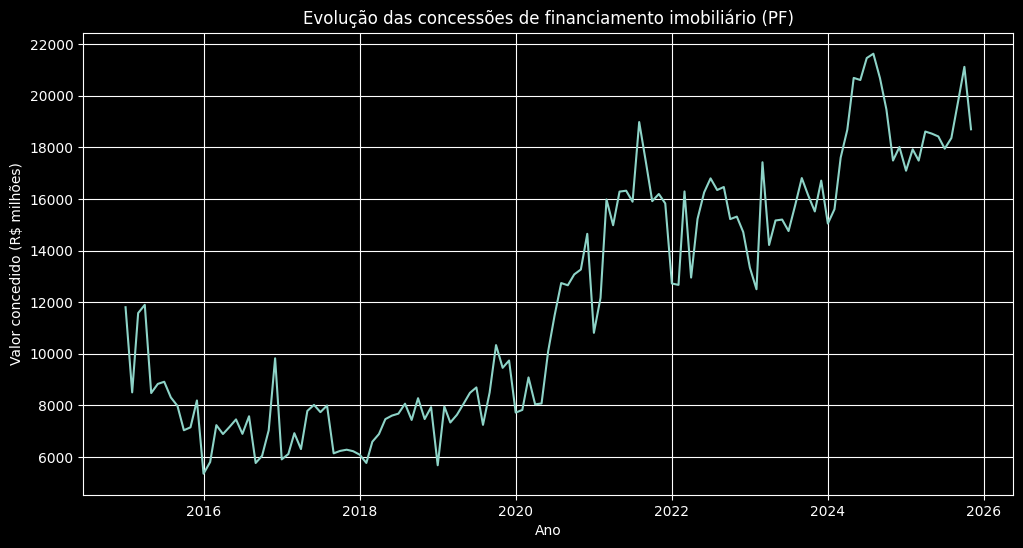

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df["data"], df["valor_concedido_milhoes"])
plt.title("Evolução das concessões de financiamento imobiliário (PF)")
plt.xlabel("Ano")
plt.ylabel("Valor concedido (R$ milhões)")
plt.grid(True)
plt.show()


In [19]:
# Valor mínimo da série
min_row = df.loc[df["valor_concedido_milhoes"].idxmin()]
min_row


data_ym                                2016-01
valor_concedido_milhoes                 5350.0
data                       2016-01-01 00:00:00
Name: 12, dtype: object

In [20]:
# Valor máximo da série
max_row = df.loc[df["valor_concedido_milhoes"].idxmax()]
max_row


data_ym                                2024-08
valor_concedido_milhoes                21634.0
data                       2024-08-01 00:00:00
Name: 115, dtype: object

In [21]:
valor_inicial = df.sort_values("data").iloc[0]["valor_concedido_milhoes"]
valor_final = df.sort_values("data").iloc[-1]["valor_concedido_milhoes"]

valor_inicial, valor_final


(np.float64(11805.0), np.float64(18704.0))

In [22]:
crescimento_percentual = ((valor_final / valor_inicial) - 1) * 100
crescimento_percentual


np.float64(58.44133841592545)


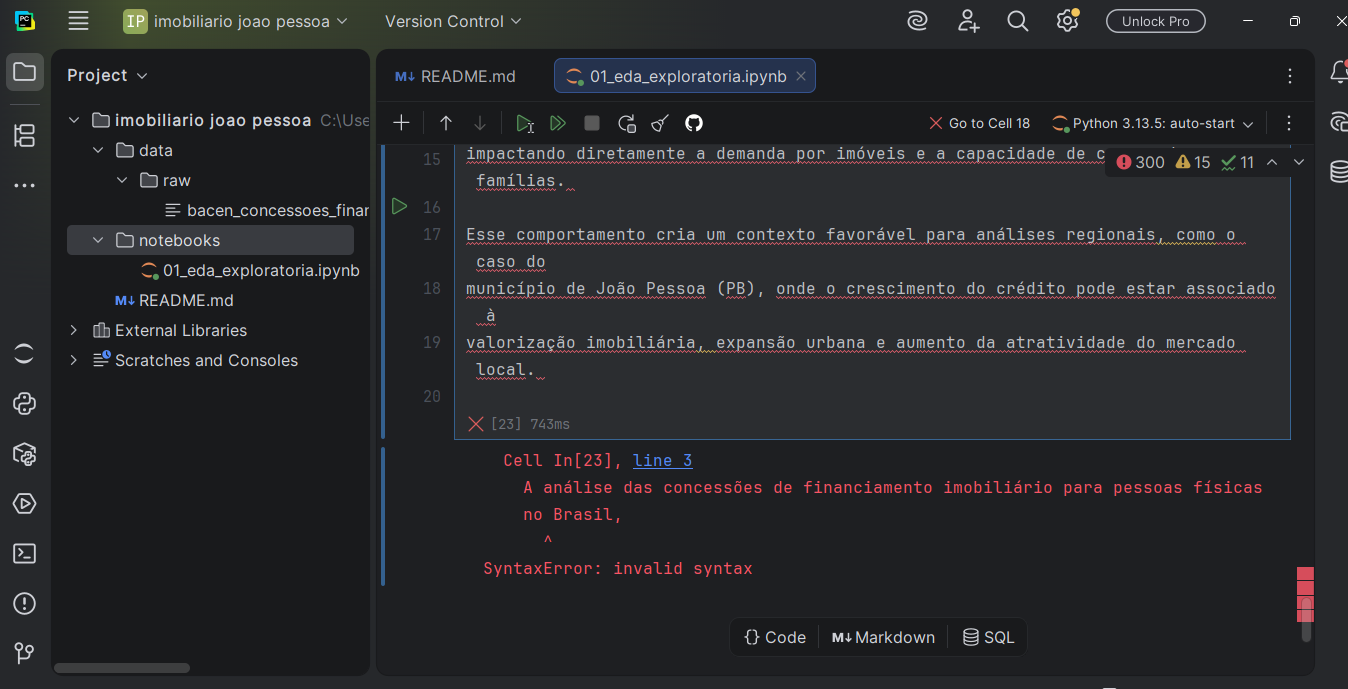

## Insight 1 — Crescimento do financiamento imobiliário (2015–2025)

A análise das concessões de financiamento imobiliário para pessoas físicas no Brasil,
com base em dados do Banco Central (BACEN), indica um crescimento aproximado de **58,4%**
no volume financeiro concedido entre janeiro de 2015 e o período mais recente da série.

Esse crescimento sugere uma expansão relevante do crédito imobiliário ao longo da última
década, refletindo fatores como:
- ampliação do acesso ao crédito habitacional,
- redução estrutural das taxas de juros em parte do período,
- fortalecimento do mercado imobiliário como alternativa de investimento e moradia.

Do ponto de vista de mercado, esse movimento indica que o financiamento imobiliário tem
se consolidado como um dos principais motores de dinamização do setor habitacional,
impactando diretamente a demanda por imóveis e a capacidade de compra das famílias.

Esse comportamento cria um contexto favorável para análises regionais, como o caso do
município de João Pessoa (PB), onde o crescimento do crédito pode estar associado à
valorização imobiliária, expansão urbana e aumento da atratividade do mercado local.


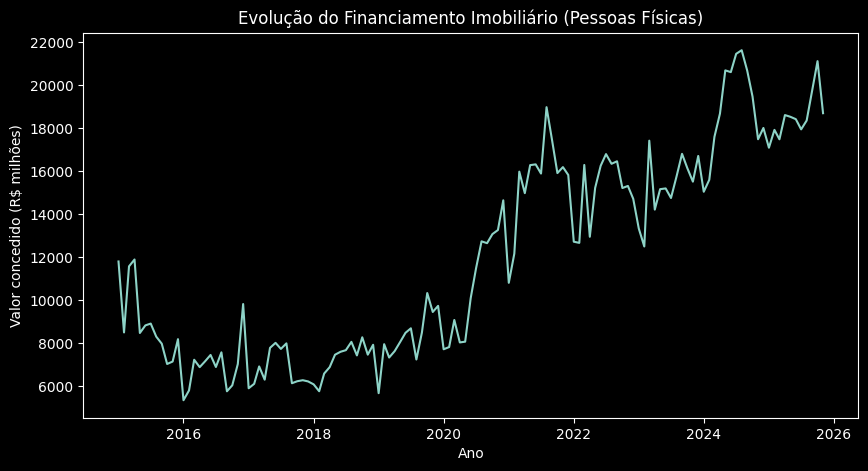

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(df["data"], df["valor_concedido_milhoes"])
plt.title("Evolução do Financiamento Imobiliário (Pessoas Físicas)")
plt.xlabel("Ano")
plt.ylabel("Valor concedido (R$ milhões)")
plt.show()


### Análise da evolução temporal do financiamento imobiliário

A série temporal das concessões de financiamento imobiliário para pessoas físicas apresenta uma tendência geral de crescimento ao longo do período analisado, indicando uma expansão contínua do crédito habitacional no Brasil.

Observa-se que, apesar de oscilações pontuais, o volume de crédito concedido mantém trajetória ascendente, sugerindo resiliência do mercado imobiliário mesmo diante de cenários macroeconômicos adversos.

Esse comportamento reforça a relevância do financiamento imobiliário como um dos principais motores de acesso à moradia e de dinamização do setor imobiliário.


### Implicações para o mercado imobiliário

O crescimento consistente das concessões de financiamento imobiliário sugere um aumento da capacidade de acesso ao crédito por parte das famílias, o que impacta diretamente a demanda por imóveis residenciais.

Esse movimento tende a influenciar fatores como valorização imobiliária, expansão urbana e maior dinamização do mercado local, especialmente em capitais regionais que apresentam crescimento populacional e econômico.


### Contextualização regional — João Pessoa (PB)

A expansão do crédito imobiliário observada em nível nacional cria um ambiente favorável para mercados regionais em crescimento, como o município de João Pessoa (PB).

João Pessoa tem se destacado nos últimos anos por fatores como crescimento populacional, expansão urbana, valorização de áreas residenciais e aumento da atratividade para novos moradores e investidores. Nesse contexto, o maior acesso ao financiamento imobiliário tende a ampliar a demanda por imóveis, impactando diretamente o mercado local.

A análise do comportamento do crédito imobiliário é, portanto, um elemento essencial para compreender a dinâmica de oferta e demanda no mercado imobiliário de João Pessoa, auxiliando incorporadoras, imobiliárias e agentes públicos na tomada de decisão.
